In [1]:
####################### Problem Statement:
1. By analyzing the given dataset we have generate insights that could help Netflex in deciding
 which type of shows to produce and which month or week day to launch a TV show so that more profit can be generated
2. What type of content is avaliable in different countires?
3. What is the best time to lanuch a TV show?
4. Analysis of actors/directors of different types of shows/movies.
5. Does Netflix has more focus on TV Shows than movies in recent years
#######################################

SyntaxError: invalid syntax (<ipython-input-1-0b8d2c8137be>, line 2)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the dataset to analyze Netflix dataset
df = pd.read_csv('/content/sample_data/netflix.csv')
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
## 2. Observation on the shape of data: In the given data we have 8807 rows and 12 columns available
df.shape

(8807, 12)

In [5]:
## Data types of all the attributes: in the given dataset mostly it contains string and intger datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
## Missing value detection: The column 'director' having highest number of missing value in given dataset
df.isnull().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


3. **Non-Graphical Analysis::** Value counts and unique attributes

In [7]:
df.nunique() # There are 4529 number of unique directors for TV shows and movie.

,0
show_id,8807
type,2
title,8804
director,4528
cast,7692
country,748
date_added,1767
release_year,74
rating,17
duration,220


In [8]:
df['country'].value_counts() #Netflix has produced more number TV shows and movie in united states.

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Romania, Bulgaria, Hungary",1
"Uruguay, Guatemala",1
"France, Senegal, Belgium",1


In [9]:
df['director'].value_counts() # Mr. Rajiv Chilaka has directed the maximum number of movies

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Suhas Kadav,16
Jay Karas,14
...,...
"Raymie Muzquiz, Stu Livingston",1
Joe Menendez,1
Eric Bross,1


In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


**# Statistical Summary:** From this 5-point summary we can easily find out that minimum shows is released in 1925 and maximum number of shows release in the year of 2021. My 25% of shows are released in the year of 2013, 50% of shows are released in the year of 2017, 75% of shows are released in the year of 2019.

In [11]:
df.columns # To check all the columns name

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

**Dealing with data preperation in structured data:-** Unnesting the director's column i.e- creating separate lines for each column director in a movie

In [12]:
#Unnesting the column "director"
df1=pd.DataFrame(df['director'].apply(lambda x :str(x).split(',')).tolist(),index=df['title'])
df1_director = df1.stack().reset_index()
df1_director.drop('level_1', axis=1,inplace=True)
df1_director.rename(columns={0:'Director'},inplace=True)
df1_director.head()

,title,Director
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan


In [13]:
#Unnesting the column "cast"
df1=pd.DataFrame(df['cast'].apply(lambda x :str(x).split(',')).tolist(),index=df['title'])
df1_cast = df1.stack().reset_index()
df1_cast.drop('level_1', axis=1,inplace=True)
df1_cast.rename(columns={0:'cast'},inplace=True)
df1_cast.head()

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [14]:
#Unnesting the column "listed_in"
df1=pd.DataFrame(df['listed_in'].apply(lambda x :str(x).split(',')).tolist(),index=df['title'])
df1_genre = df1.stack().reset_index()
df1_genre.drop('level_1', axis=1,inplace=True)
df1_genre.rename(columns={0:'genre'},inplace=True)
df1_genre.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows


In [15]:
#Unnesting the column "country"
df1=pd.DataFrame(df['country'].apply(lambda x :str(x).split(',')).tolist(),index=df['title'])
df1_country = df1.stack().reset_index()
df1_country.drop('level_1', axis=1,inplace=True)
df1_country.rename(columns={0:'country'},inplace=True)
df1_country.head()

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India


In [16]:
#Merging all the unnested columns together
df_new =df1_director.merge(df1_cast, how='inner',on='title')
df_new=df_new.merge(df1_genre,how='inner',on='title')
df_new=df_new.merge(df1_country,how='inner',on='title')
df_new.head()

,title,Director,cast,genre,country
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa


In [17]:
# Final structured data with all columns
df_final = df_new.merge(df[['show_id', 'type', 'title','date_added',
       'release_year', 'rating', 'duration']],on =['title'], how='left')
df_final

,title,Director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
204640,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204641,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204642,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204643,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [18]:
# Count of Movies and TV Shows:
df_final.groupby('type')['title'].count()

,title
type,
Movie,147897
TV Show,56748


In [19]:
# Count of Movies directed by each director:
df_final.groupby('Director')['title'].count().sort_values(ascending=False)

,title
Director,
nan,51243
Paul Greengrass,1384
Swapnaneel Jayakar,768
Martin Scorsese,419
Youssef Chahine,409
...,...
Robb Dipple,1
James Moll,1
Todd Wider,1


In [20]:
#Count of movies produced in each country:
movies_count_by_country = df_final.groupby('country')['title'].count().sort_values(ascending=False)
movies_count_by_country

,title
country,
United States,49868
India,22859
nan,12497
United States,9902
United Kingdom,9733
...,...
Ukraine,2
Samoa,2
Uganda,1


In [21]:
# Top 10 movie producing countries:
Top_10_countries = movies_count_by_country.head(10)
Top_10_countries


,title
country,
United States,49868
India,22859
nan,12497
United States,9902
United Kingdom,9733
Japan,7317
South Korea,4628
Canada,4395
Spain,4255


In [22]:
# Count of movies released each year:
df[df_final['type']=='Movie'].groupby('release_year')['title'].count().sort_values(ascending=False)

<ipython-input-22-5cb12a14a1ce>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df_final['type']=='Movie'].groupby('release_year')['title'].count().sort_values(ascending=False)


,title
release_year,
2018,904
2019,839
2017,735
2020,659
2016,619
...,...
1956,1
1961,1
1966,1


In [23]:
# Number of TV shows produced in each country:
count_tvshows = df[df_final['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False)
count_tvshows

<ipython-input-23-2a87e8609139>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_tvshows = df[df_final['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False)


,title
country,
United States,720
India,269
United Kingdom,123
Japan,90
Canada,55
...,...
"Ireland, United Kingdom, Italy, United States",1
"Ireland, United States, France",1
"Ireland, United States, United Kingdom",1


In [24]:
# Top 10 TV show producing countries:
count_tvshows.head(10)

,title
country,
United States,720
India,269
United Kingdom,123
Japan,90
Canada,55
South Korea,48
Spain,44
France,35
Egypt,34


In [25]:
# Count of Movies in each country:
count_movies = df[df_final['type']=='Movie'].groupby('country')['title'].count().sort_values(ascending=False)
count_movies

<ipython-input-25-6a10a62e55db>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  count_movies = df[df_final['type']=='Movie'].groupby('country')['title'].count().sort_values(ascending=False)


,title
country,
United States,2098
India,703
United Kingdom,296
Japan,155
South Korea,151
...,...
"India, United Kingdom, Canada, United States",1
"India, United Kingdom",1
"India, Turkey",1


In [26]:
# Name of top 5 TV shows watch in South Africa from Season-2
df_final_TV = df_final[df_final['type']=='TV Show']
df_final_TV.head(5)

,title,Director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
1,Blood & Water,nan,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,nan,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,nan,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,nan,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
5,Blood & Water,nan,Khosi Ngema,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [27]:
#Top 5 Movie Directed are from US and other country
df_final_Movie = df_final[df_final['type']=='Movie']
df_final_Movie.head(5)

,title,Director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,nan,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
159,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Children & Family Movies,nan,s7,Movie,"September 24, 2021",2021,PG,91 min
160,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Children & Family Movies,nan,s7,Movie,"September 24, 2021",2021,PG,91 min
161,My Little Pony: A New Generation,Robert Cullen,James Marsden,Children & Family Movies,nan,s7,Movie,"September 24, 2021",2021,PG,91 min
162,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Children & Family Movies,nan,s7,Movie,"September 24, 2021",2021,PG,91 min


In [28]:
# Top 10 movie producing countires:
count_movies.head(10)

,title
country,
United States,2098
India,703
United Kingdom,296
Japan,155
South Korea,151
Canada,126
Spain,101
France,89
Mexico,82


**Dealing with Missing Value**

In [29]:
# Replace the missing value with Unknown
df_final['cast'].replace(['nan'], ['Unknown Actor'], inplace = True)
df_final['Director'].replace(['nan'], ['Unknown Directors'], inplace = True)
df_final['country'].replace(['nan'], ['Unknown Country'], inplace =True)
df_final['genre'].replace(['nan'], ['Unknwon genre'], inplace =True)

In [30]:
# we are filling the missing date_added rows.
for i in df_final[df_final['date_added'].isnull()]['release_year'].unique():
    imp=df_final[df_final['release_year']==i]['date_added'].mode().values[0]
    df_final.loc[df_final['release_year']==i,'date_added']=df_final.loc[df_final['release_year']==i,'date_added'].fillna(imp)

In [31]:
# now we are filling the missing values of rating Column
df_final.loc[df_final['rating'].str.contains('min', na =False),'rating'] = 'NR'
df_final['rating'].fillna('NR', inplace = True)
df_final.head()

,title,Director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [32]:
# we now changing the mistaken rating column to the duration
df_final.loc[df_final['duration'].isnull(), 'duration'] = df_final.loc[df_final['duration'].isnull(), 'duration'].fillna(df_final['rating'])

In [33]:
df_final.isnull().sum()

,0
title,0
Director,0
cast,0
genre,0
country,0
show_id,0
type,0
date_added,0
release_year,0
rating,0


In [34]:
df_final

,title,Director,cast,genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Unknown Directors,Ama Qamata,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Unknown Directors,Ama Qamata,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Unknown Directors,Ama Qamata,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Unknown Directors,Khosi Ngema,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
204640,Zubaan,Mozez Singh,Anita Shabdish,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204641,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204642,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
204643,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


**Univariate Analysis:**

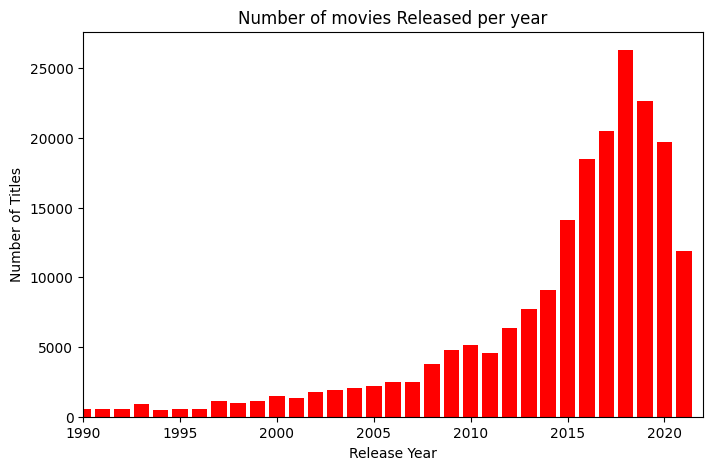

In [35]:
#Bar Plot: From this plot we can identify that more number movies is released in between 2015 to 2020
title = df_final['title']
release_year = df_final['release_year']
# Group by 'release_year' and count the number of titles for each year
grouped_df = df_final.groupby('release_year')['title'].count()

# Create a figure
plt.figure(figsize=(8,5))

# Plot the bar chart with grouped data
plt.bar(grouped_df.index, grouped_df.values, color='red')
plt.xlim(1990,2022)
# Add labels
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Number of movies Released per year')
plt.show()

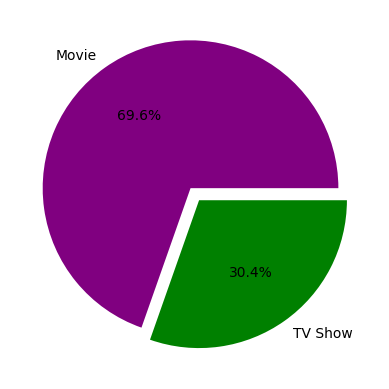

In [36]:
# From this pie chart we can indentify that nearly 70% movies are produced at netflix worldwide.
df_pie=df_final.groupby(['type'])['title'].nunique().reset_index()
plt.pie(df_pie['title'],explode=(0.05,0.05), labels=df_pie['type'],colors=['purple','green'],autopct='%1.1f%%')
plt.show()

In [37]:
# Number of Distinct titles on the basis of duration
df_final.groupby('duration').agg({"title" : "nunique"})

,title
duration,
1 Season,1792
10 Seasons,7
10 min,1
100 min,108
101 min,116
...,...
96 min,130
97 min,146
98 min,120


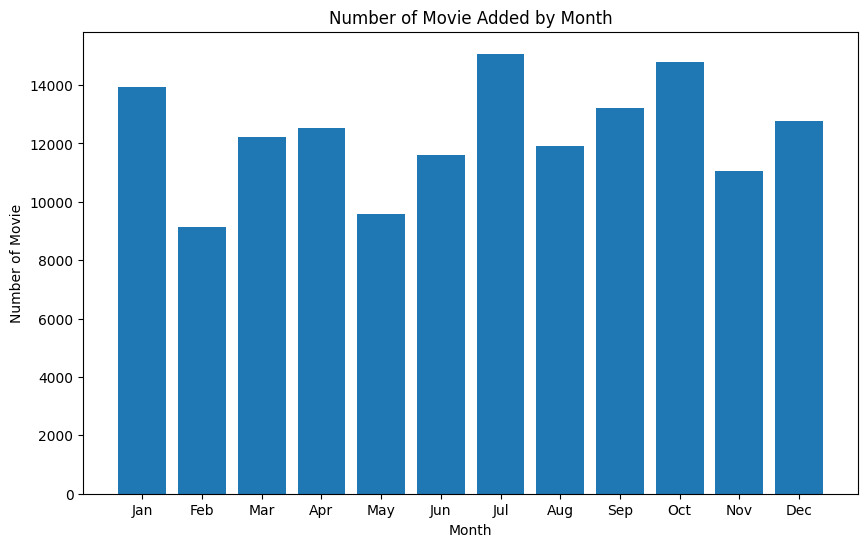

The best month to launch a Movie is: 7.0


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime objects
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

# Extract the month from 'date_added'
df_final['month_added'] = df_final['date_added'].dt.month

# Group by month and count the number of TV shows added in each month
# Use df_final instead of df
movies_by_month = df_final[df_final['type'] == 'Movie'].groupby('month_added').size()

# Create a bar chart to visualize the distribution of TV show releases across months
plt.figure(figsize=(10, 6))
plt.bar(movies_by_month.index, movies_by_month.values)
plt.title('Number of Movie Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of Movie')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Find the month with the highest number of TV show releases
best_month_to_launch = movies_by_month.idxmax()
print(f"The best month to launch a Movie is: {best_month_to_launch}")

#As we can see the major releases month are between jan , dec , april and july, July being the best month to realease a movie. It could be for various reason like for india that's summer vacation was kids and also the monsoon so a lot more people tend to netflix and chill
#also we can see the worst month to upload a movie would be feb maybe because the workload and school load is high

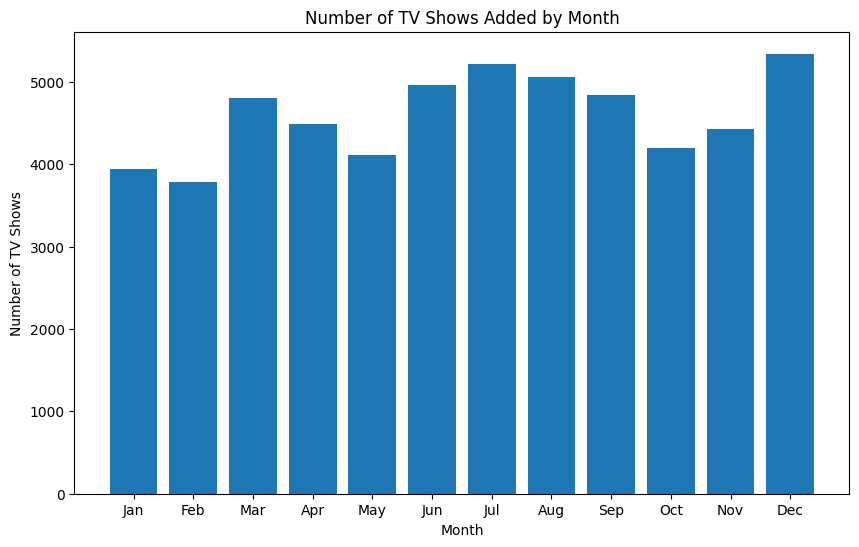

The best month to launch a TV show is: 12.0


In [39]:
# What is the best time to launch a TV show?

# Convert 'date_added' to datetime objects
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce') # Use df_final here, not df

# Extract the month from 'date_added'
df_final['month_added'] = df_final['date_added'].dt.month

# Group by month and count the number of TV shows added in each month
tv_shows_by_month = df_final[df_final['type'] == 'TV Show'].groupby('month_added').size() # Use df_final here, not df

# Create a bar chart to visualize the distribution of TV show releases across months
plt.figure(figsize=(10, 6))
plt.bar(tv_shows_by_month.index, tv_shows_by_month.values)
plt.title('Number of TV Shows Added by Month')
plt.xlabel('Month')
plt.ylabel('Number of TV Shows')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Find the month with the highest number of TV show releases
best_month_to_launch = tv_shows_by_month.idxmax()
print(f"The best month to launch a TV show is: {best_month_to_launch}")

# As we can see that july tends to be a better month to upload tv shows as well could be for the same reasons

          cast  Director
type                    
Movie    27880      4887
TV Show  15502       301


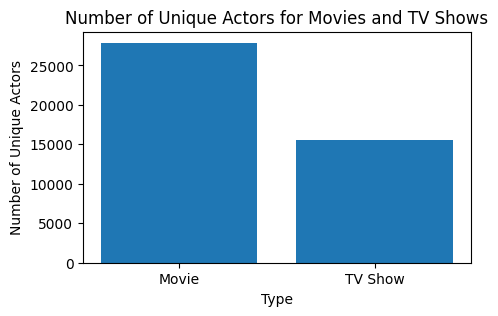

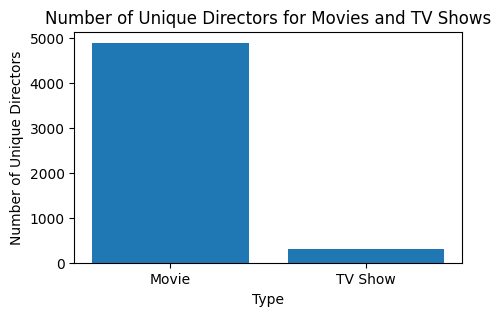

Most frequent movie actors:
cast
 Anupam Kher         25
 Takahiro Sakurai    23
 Om Puri             21
 Paresh Rawal        20
 Boman Irani         18
 Andrea Libman       18
Akshay Kumar         17
 Vincent Tong        17
 Yuki Kaji           15
 Asrani              15
Name: count, dtype: int64


<ipython-input-40-4f806601c05f>:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  movie_actors = df[df_final['type'] == 'Movie']['cast'].str.split(',').explode().dropna()


In [40]:
# Analysis of actors/directors of different types of shows/movies

# Assuming your dataframe is named 'df' and has 'cast' and 'director' columns

# Group by type and count the number of unique actors and directors for each type
actor_director_counts = df_final.groupby('type').agg({'cast': lambda x: x.str.split(',').explode().nunique(),
                                              'Director': lambda x: x.str.split(',').explode().nunique()})

# Print the counts
print(actor_director_counts)

# Create a bar chart to compare the number of unique actors for each type
plt.figure(figsize=(5, 3))
plt.bar(actor_director_counts.index, actor_director_counts['cast'].values)
plt.title('Number of Unique Actors for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Unique Actors')
plt.show()

# Create a bar chart to compare the number of unique directors for each type
plt.figure(figsize=(5, 3))
plt.bar(actor_director_counts.index, actor_director_counts['Director'].values)
plt.title('Number of Unique Directors for Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Number of Unique Directors')
plt.show()

# You can further analyze the most frequent actors and directors for each type
# For example, to find the most frequent actors in movies:
movie_actors = df[df_final['type'] == 'Movie']['cast'].str.split(',').explode().dropna()
most_frequent_movie_actors = movie_actors.value_counts().head(10)
print("Most frequent movie actors:")
print(most_frequent_movie_actors)

# Similarly, you can analyze directors or actors for TV shows.

#As we can see there are a lot more cast and drastically a lot more number of directors between movies and tv shows.
#it could be that since tv shows take longer to make a lot lesser directors sign up to make tv shows.

<ipython-input-41-661a4797eb9e>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  recent_years_df = df[df_final['date_added'] >= pd.to_datetime('today') - pd.DateOffset(years=5)]


type
Movie      6131
TV Show    2676
dtype: int64


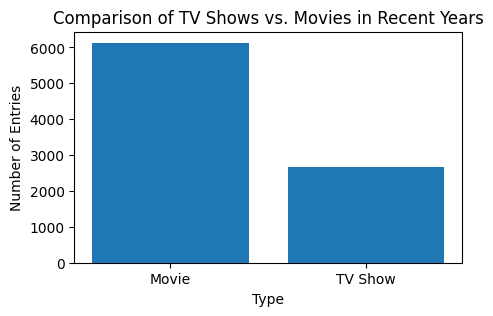

Netflix has more focus on Movies than TV Shows in recent years.


In [41]:
#Does Netflix has more focus on TV Shows than movies in recent years

# Convert 'date_added' to datetime objects
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

# Filter data for recent years (e.g., last 5 years)
recent_years_df = df[df_final['date_added'] >= pd.to_datetime('today') - pd.DateOffset(years=5)]

# Group by type and count the number of entries for each type in recent years
recent_type_counts = recent_years_df.groupby('type').size()

# Print the counts for each type in recent years
print(recent_type_counts)

# Create a bar chart to visualize the comparison in recent years
plt.figure(figsize=(5, 3))
plt.bar(recent_type_counts.index, recent_type_counts.values)
plt.title('Comparison of TV Shows vs. Movies in Recent Years')
plt.xlabel('Type')
plt.ylabel('Number of Entries')
plt.show()

# Compare the counts of TV Shows and Movies in recent years
if recent_type_counts['TV Show'] > recent_type_counts['Movie']:
  print("Netflix has more focus on TV Shows than Movies in recent years.")
else:
  print("Netflix has more focus on Movies than TV Shows in recent years.")
#netflix has been making more movies than tv shows but it also has a good amount of tv shows present.

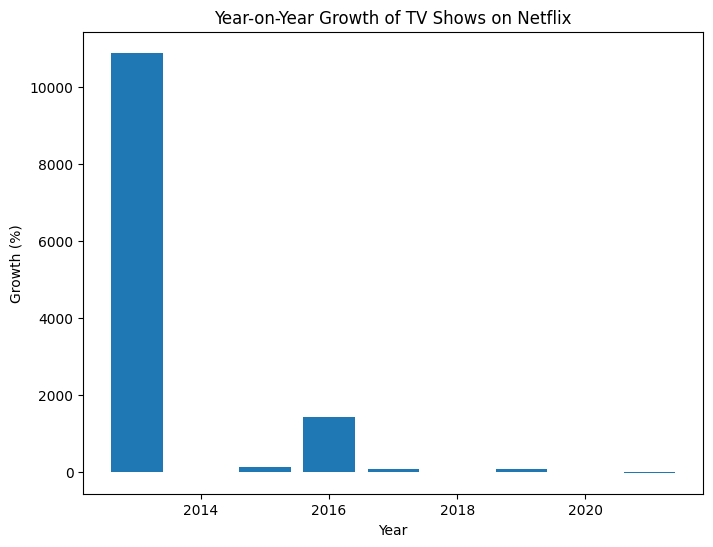

year_added
2008.0             NaN
2013.0    10900.000000
2014.0       -5.454545
2015.0      123.076923
2016.0     1440.517241
2017.0       83.407946
2018.0       11.624714
2019.0       75.919093
2020.0        5.228403
2021.0      -19.896641
dtype: float64


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime objects
df_final['date_added'] = pd.to_datetime(df_final['date_added'], errors='coerce')

# Extract the year from 'date_added'
df_final['year_added'] = df_final['date_added'].dt.year

# Filter for TV shows only
tv_shows_df = df_final[df_final['type'] == 'TV Show'] # Changed df to df_final

# Group by year and count the number of TV shows added in each year
tv_shows_by_year = tv_shows_df.groupby('year_added').size()

# Calculate year-on-year growth
tv_shows_by_year_growth = tv_shows_by_year.pct_change() * 100

# Create a bar chart to visualize the year-on-year growth
plt.figure(figsize=(8, 6))
plt.bar(tv_shows_by_year_growth.index, tv_shows_by_year_growth.values)
plt.title('Year-on-Year Growth of TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Growth (%)')
plt.show()

# Print the year-on-year growth for each year
print(tv_shows_by_year_growth)

#As we can see 2016 was the year with the most amount of tv shows released and since then it has reduced drastically.
#By comparring to the previous years you can see that the focus on tv shows has reduced lately

**Bivariate Analysis:-**

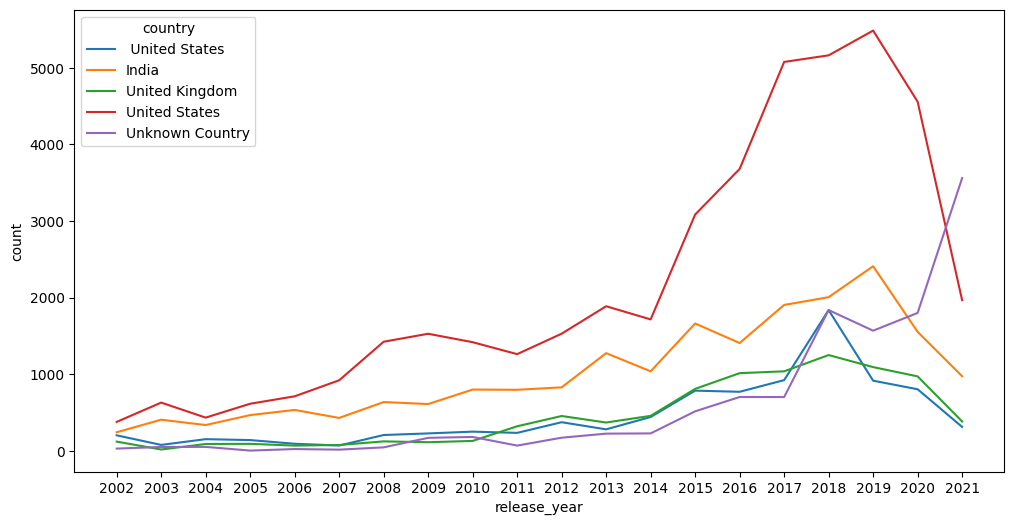

In [43]:
# We can identify that USA is releasing more number of conent compared to other countires and India is in second position.
plt.figure(figsize=(12, 6))

# Group the data by 'country' and 'release_year' and count occurrences
df_grouped = df_final.groupby(['release_year', 'country']).size().reset_index(name='count')

# Get the top 5 countries based on total count
top_countries = df_grouped.groupby('country')['count'].sum().nlargest(5).index

# Get the top 5 release years based on total count
top_release_years = df_grouped.groupby('release_year')['count'].sum().nlargest(20).index

# Filter the grouped data to only include the top 5 countries and top 5 release years
df_top = df_grouped[df_grouped['country'].isin(top_countries) & df_grouped['release_year'].isin(top_release_years)]

# Plot using seaborn's lineplot, with hue for countries
sns.lineplot(data=df_top, x='release_year', y='count', hue='country')

# Set x-axis ticks to be the filtered release years
plt.xticks(sorted(top_release_years))

# Show the plot
plt.show()


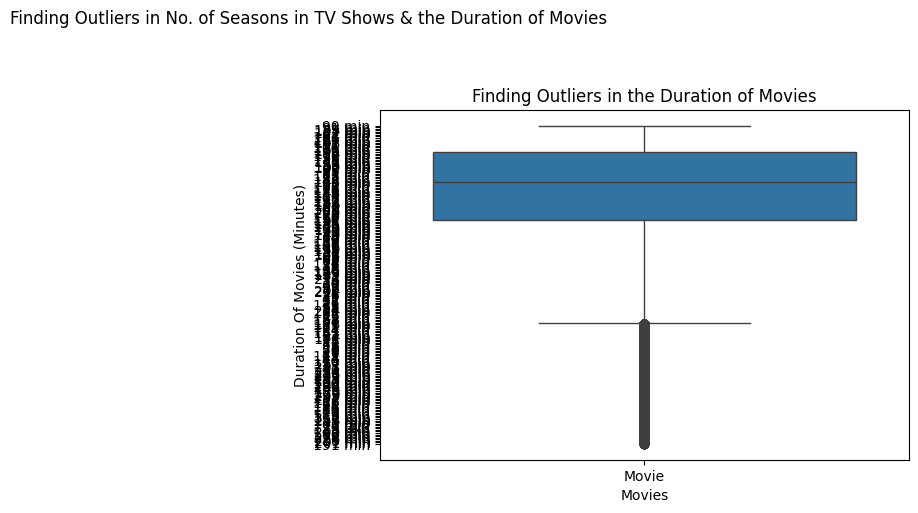

In [44]:
#Finding Outliers in No.of Seasons in TV Shows & the Duration of Movies
#Graphical RepresentatioTn using box plot
df_movies = df_final[df_final['type'] == 'Movie']

# Group the data by 'duration' (if needed, depending on aggregation logic)
# If you want to count occurrences of each duration:
df_grouped_movies = df_movies.groupby('duration').size().reset_index(name='count')

# Create the figure for the boxplots
fig = plt.figure(figsize=(15,10))

# subplot for Movies (Duration)
plt.subplot(2, 2, 2)
sns.boxplot(x='type', y='duration', data=df_movies)
plt.title("Finding Outliers in the Duration of Movies")
plt.xlabel("Movies")
plt.ylabel("Duration Of Movies (Minutes)")

# Add a main title for both plots
plt.suptitle("Finding Outliers in No. of Seasons in TV Shows & the Duration of Movies")

# Show the plot
plt.show()


**Business Insights:**
1. It is known that R rating in india has very few titles (6)
2. 93.52% of the content was added in the netfix in 5 years(2017–2021) and the rest 6.48% was added in 9 years (2008–2017)
3. Average Duration of Movies is nearly 106 Min and Tv shows is 2 seasons
4. Top 10 Genre covers 65.77% and the rest 32 Genre covers 34.23%

**Recommendation:**

1. As seen in the Business Insight, Most of the country’s content potential is yet to unfold and many regional content is witnessed to breakthrough the popularity in recent years, so it is recommended to search for such regional content that may have the right potential to attract more users with the help of newly introduced novelty.
2. It is understood that out of selective revenue models of Netflix, Ad revenue is indeed an important one
3. Countries like Japan, Greece, Italy, Germany etc are known to have higher % of old people, Netflix can study the demographics of all countries to target the most optimal audience, in general it is undoubtedly the adult users that is targeted but, tailoring the content based on Demographics of country might help expand the userbase.
4. Since pandemic, a boom in online education is seen (also known as zoom era), Netflix can tap into this demand and enable content for kids where entertaining education can help expand userbase under “Netflix for kids!”
5. We can interpret top Genres here as widely accepted genre and content produced under such genre would have higher probability of popularity and acceptance by the audience.
